# ALLIANZ DATA TALENT PROGRAM
Primera Edición
Datathon - Grupo 5:
- Luis Lamiable
- Francisco Noya 
- Xavier Sancho
- Xia Wang

**Punto de Partida**

"En primer lugar se os facilitarán **tres bases de datos**:
    - La **primera** contiene, para un conjunto de ID's, la información histórica de pagos (o impagos) de cuotas de primas de seguro ocntratados con una entidad aseguradora; esta información se presenta en series  históricas de entre 1 y 60 meses.
    - La **segunda** tabla contiene información cualitativa para una serie de ID's.
    - La **tercera** contiene la dirección completa, código postal y estado dentro de los Estados Unidos.

Os enfrentáis al siguiente reto...

A través de los datos anteriormente comentados, **¿se puede saber a qué clientes nuevos se le puede otorgar un fraccionamiento de prima gratuito?**

Debéis asumir que de estos clientes nuevos se dispondrá de la misma información cualitativa presente en la base de datos del reto."

- Primera tabla: paid_record.csv
- Segunda tabla: main.csv
- Tercera tabla: address.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_main = pd.read_csv("main.csv")
df_main

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438752,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,1.0,1.0,0.0,0.0,Sales staff,2.0,04/06/1991,X,6153574
438753,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,1.0,0.0,NaN,0.0,NaN,2.0,05/01/1978,V,6153575
438754,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,1.0,0.0,0.0,0.0,Sales staff,2.0,07/03/1974,J,6153576
438755,M,N,NaN,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,1.0,1.0,0.0,0.0,Laborers,2.0,08/03/1965,S,6153578


In [3]:
df_address = pd.read_csv("address.csv")
df_address

,New_ID,ADDRESS
0,5008804L,"06042, CT, 31 Mitchell Road"
1,5008805G,"72703, AR, 1189 Northwest End Avenue"
2,5008806D,"72701, AR, 218 Shipley Alley"
3,5008808I,"3138 P Street Northwest, 20007, DC"
4,5008809Z,"2405 230th Street, 21122, MD"
...,...,...
438752,5680433,"37080, TN, 7730 Wilkinson Road"
438753,5353755,"2815 Saint Edwards Drive, 37211, TN"
438754,5689895,"85306, AZ, 5434 West Beck Lane"
438755,5833391,"05641, VT, 21 Hill Street"


In [4]:
df_paid = pd.read_csv("paid_record.csv")
df_paid

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
len(df_paid['ID'].unique())

45985

# DATA CLEANING:
Procedemos a tratar el data treatment and cleansing (limpieza de datos erróneos, duplicados, outliers, cambios de formatos, unión entre tablas, etc.).

In [6]:
df_main["New_ID"] = df_main["Main_ID"].astype(str) + df_main["Letter"]
df_main

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804,5008804L
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805,5008805G
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,5008806D
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808,5008808I
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809,5008809Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438752,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,1.0,1.0,0.0,0.0,Sales staff,2.0,04/06/1991,X,6153574,6153574X
438753,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,1.0,0.0,NaN,0.0,NaN,2.0,05/01/1978,V,6153575,6153575V
438754,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,1.0,0.0,0.0,0.0,Sales staff,2.0,07/03/1974,J,6153576,6153576J
438755,M,N,NaN,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,1.0,1.0,0.0,0.0,Laborers,2.0,08/03/1965,S,6153578,6153578S


In [7]:
df_main['Main_ID'].duplicated().sum()

247

In [33]:
df_main.loc[df_main['Main_ID'].duplicated()]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID
421349,F,N,N,0.0,117000.0,Pensioner,Higher education,Married,House / apartment,365243.0,1.0,0.0,0.0,0.0,NaN,2.0,29/06/1955,Y,7602432,7602432Y
422660,M,Y,Y,2.0,166500.0,Working,Secondary / secondary special,Married,House / apartment,-2697.0,1.0,1.0,0.0,1.0,Managers,4.0,27/08/1979,B,7052783,7052783B
423702,F,Y,Y,0.0,315000.0,Commercial associate,Higher education,Single / not married,House / apartment,-1659.0,1.0,0.0,0.0,NaN,NaN,1.0,06/11/1993,T,7838075,7838075T
424480,M,Y,Y,1.0,193500.0,Working,Secondary / secondary special,Married,House / apartment,-2250.0,1.0,1.0,0.0,0.0,Core staff,3.0,23/07/1994,O,7053557,7053557O
425306,F,NaN,N,0.0,NaN,Commercial associate,Incomplete higher,Single / not married,House / apartment,-1209.0,1.0,0.0,0.0,0.0,Accountants,1.0,18/02/1995,Y,7023651,7023651Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438752,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,1.0,1.0,0.0,0.0,Sales staff,2.0,04/06/1991,X,6153574,6153574X
438753,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,1.0,0.0,NaN,0.0,NaN,2.0,05/01/1978,V,6153575,6153575V
438754,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,1.0,0.0,0.0,0.0,Sales staff,2.0,07/03/1974,J,6153576,6153576J
438755,M,N,NaN,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,1.0,1.0,0.0,0.0,Laborers,2.0,08/03/1965,S,6153578,6153578S


In [9]:
df_main.loc[df_main['Main_ID'] == 7052783]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID
421726,M,Y,Y,0.0,157500.0,Working,Higher education,Married,House / apartment,-2589.0,1.0,0.0,1.0,0.0,Laborers,2.0,17/05/1986,T,7052783,7052783T
422660,M,Y,Y,2.0,166500.0,Working,Secondary / secondary special,Married,House / apartment,-2697.0,1.0,1.0,0.0,1.0,Managers,4.0,27/08/1979,B,7052783,7052783B


In [10]:
len(df_main['New_ID'].unique())

438552

In [11]:
#Procedemos a encontrar los duplicados en el dataset df_address (address.csv)
df_address.duplicated().sum()

100

In [12]:
df_address.drop_duplicates(inplace=True)
df_address

,New_ID,ADDRESS
0,5008804L,"06042, CT, 31 Mitchell Road"
1,5008805G,"72703, AR, 1189 Northwest End Avenue"
2,5008806D,"72701, AR, 218 Shipley Alley"
3,5008808I,"3138 P Street Northwest, 20007, DC"
4,5008809Z,"2405 230th Street, 21122, MD"
...,...,...
438652,5680433,"37080, TN, 7730 Wilkinson Road"
438653,5353755,"2815 Saint Edwards Drive, 37211, TN"
438654,5689895,"85306, AZ, 5434 West Beck Lane"
438655,5833391,"05641, VT, 21 Hill Street"


In [13]:
#Realizamos el merge entre df_address y df_main.
df = pd.merge(df_main, df_address, how='inner')
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
1,F,N,Y,1.0,90000.0,State servant,Secondary / secondary special,Married,House / apartment,-3659.0,...,0.0,0.0,0.0,Medicine staff,3.0,07/06/1984,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
2,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
3,M,N,Y,0.0,180000.0,Working,Higher education,Civil marriage,With parents,-390.0,...,0.0,0.0,0.0,Sales staff,2.0,21/02/1995,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
4,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,...,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,5008806D,"72701, AR, 218 Shipley Alley"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438762,M,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,NaN,...,0.0,0.0,0.0,NaN,1.0,NaN,L,6840104,6840104L,"1699 Chatham Parkway, 31405, GA"
438763,F,N,N,0.0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-3007.0,...,0.0,0.0,0.0,Laborers,1.0,02/07/1979,Y,6840222,6840222Y,"14285 Wycliff Way, 95954, CA"
438764,NaN,N,N,0.0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-372.0,...,1.0,0.0,0.0,Sales staff,1.0,09/10/2000,A,6841878,6841878A,"73034, OK, 1605 Remington Road"
438765,F,N,Y,0.0,72000.0,Pensioner,Secondary / secondary special,Married,NaN,365243.0,...,0.0,0.0,0.0,NaN,2.0,20/10/1963,R,6842765,6842765R,"73008, OK, 4709 North Willow Avenue"


In [14]:
df['Main_ID'].duplicated().sum()

257

In [15]:
#Tras encontrar los duplicados, los dropeamos.
df['Main_ID'].drop_duplicates(inplace=True)
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
1,F,N,Y,1.0,90000.0,State servant,Secondary / secondary special,Married,House / apartment,-3659.0,...,0.0,0.0,0.0,Medicine staff,3.0,07/06/1984,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
2,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
3,M,N,Y,0.0,180000.0,Working,Higher education,Civil marriage,With parents,-390.0,...,0.0,0.0,0.0,Sales staff,2.0,21/02/1995,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
4,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,...,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,5008806D,"72701, AR, 218 Shipley Alley"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438762,M,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,NaN,...,0.0,0.0,0.0,NaN,1.0,NaN,L,6840104,6840104L,"1699 Chatham Parkway, 31405, GA"
438763,F,N,N,0.0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-3007.0,...,0.0,0.0,0.0,Laborers,1.0,02/07/1979,Y,6840222,6840222Y,"14285 Wycliff Way, 95954, CA"
438764,NaN,N,N,0.0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-372.0,...,1.0,0.0,0.0,Sales staff,1.0,09/10/2000,A,6841878,6841878A,"73034, OK, 1605 Remington Road"
438765,F,N,Y,0.0,72000.0,Pensioner,Secondary / secondary special,Married,NaN,365243.0,...,0.0,0.0,0.0,NaN,2.0,20/10/1963,R,6842765,6842765R,"73008, OK, 4709 North Willow Avenue"


In [16]:
df.describe

<bound method NDFrame.describe of        CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0                M            Y               Y           0.0   
1                F            N               Y           1.0   
2                M            Y               Y           0.0   
3                M            N               Y           0.0   
4                M            Y               Y           0.0   
...            ...          ...             ...           ...   
438762           M            N               Y           0.0   
438763           F            N               N           0.0   
438764         NaN            N               N           0.0   
438765           F            N               Y           0.0   
438766           F            N               Y           0.0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1                90000.

In [17]:
df['FLAG_MOBIL'].value_counts()

1.0    427700
Name: FLAG_MOBIL, dtype: int64

In [18]:
df.nunique()
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
1,F,N,Y,1.0,90000.0,State servant,Secondary / secondary special,Married,House / apartment,-3659.0,...,0.0,0.0,0.0,Medicine staff,3.0,07/06/1984,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
2,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
3,M,N,Y,0.0,180000.0,Working,Higher education,Civil marriage,With parents,-390.0,...,0.0,0.0,0.0,Sales staff,2.0,21/02/1995,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
4,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,...,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,5008806D,"72701, AR, 218 Shipley Alley"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438762,M,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,NaN,...,0.0,0.0,0.0,NaN,1.0,NaN,L,6840104,6840104L,"1699 Chatham Parkway, 31405, GA"
438763,F,N,N,0.0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-3007.0,...,0.0,0.0,0.0,Laborers,1.0,02/07/1979,Y,6840222,6840222Y,"14285 Wycliff Way, 95954, CA"
438764,NaN,N,N,0.0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-372.0,...,1.0,0.0,0.0,Sales staff,1.0,09/10/2000,A,6841878,6841878A,"73034, OK, 1605 Remington Road"
438765,F,N,Y,0.0,72000.0,Pensioner,Secondary / secondary special,Married,NaN,365243.0,...,0.0,0.0,0.0,NaN,2.0,20/10/1963,R,6842765,6842765R,"73008, OK, 4709 North Willow Avenue"


In [19]:
df.isna().sum()

CODE_GENDER             10863
FLAG_OWN_CAR            11052
FLAG_OWN_REALTY         10951
CNT_CHILDREN            10931
AMT_INCOME_TOTAL        11133
NAME_INCOME_TYPE        11039
NAME_EDUCATION_TYPE     11103
NAME_FAMILY_STATUS      10985
NAME_HOUSING_TYPE       11065
DAYS_EMPLOYED           10973
FLAG_MOBIL              11067
FLAG_WORK_PHONE         11042
FLAG_PHONE              11083
FLAG_EMAIL              10988
OCCUPATION_TYPE        141809
CNT_FAM_MEMBERS         10934
DAYS_BIRTH_CLEAN        10715
Letter                      0
Main_ID                     0
New_ID                      0
ADDRESS                     0
dtype: int64

In [20]:
#Tras hacer el recuento de nulos totales en el dataset, importamos la librería seaborn para realizar un heatmap de estos valores nulos y así visualizarlos fácilmente.
import seaborn as sns

<Axes: >

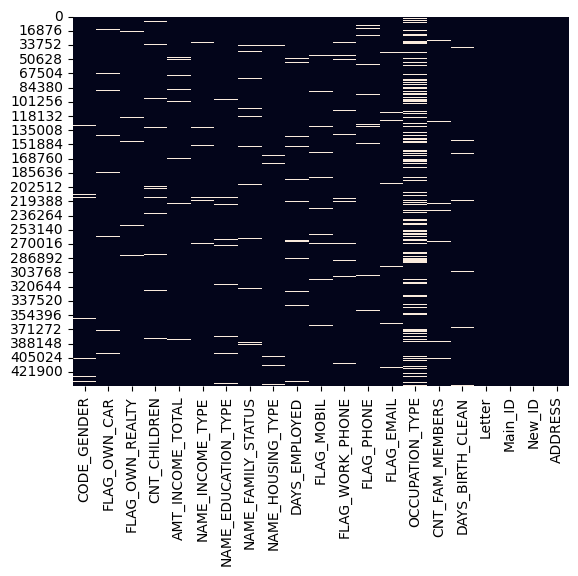

In [21]:
sns.heatmap(df.isnull(), cbar=False)

In [22]:
#Imputamos los valores nules de "OCCUPATION" como "NONE".
df['OCCUPATION_TYPE'].fillna('None', inplace=True)

In [23]:
df['OCCUPATION_TYPE'].value_counts()

None                     141809
Laborers                  76378
Core staff                42020
Sales staff               40068
Managers                  34603
Drivers                   25471
High skill tech staff     16845
Accountants               15616
Medicine staff            13194
Cooking staff              7874
Security staff             7792
Cleaning staff             5685
Private service staff      3364
Low-skill Laborers         2086
Secretaries                1990
Waiters/barmen staff       1616
Realty agents              1009
HR staff                    760
IT staff                    587
Name: OCCUPATION_TYPE, dtype: int64

In [24]:
df.isna().sum()

CODE_GENDER            10863
FLAG_OWN_CAR           11052
FLAG_OWN_REALTY        10951
CNT_CHILDREN           10931
AMT_INCOME_TOTAL       11133
NAME_INCOME_TYPE       11039
NAME_EDUCATION_TYPE    11103
NAME_FAMILY_STATUS     10985
NAME_HOUSING_TYPE      11065
DAYS_EMPLOYED          10973
FLAG_MOBIL             11067
FLAG_WORK_PHONE        11042
FLAG_PHONE             11083
FLAG_EMAIL             10988
OCCUPATION_TYPE            0
CNT_FAM_MEMBERS        10934
DAYS_BIRTH_CLEAN       10715
Letter                     0
Main_ID                    0
New_ID                     0
ADDRESS                    0
dtype: int64

In [25]:
df.corr()

/var/folders/yp/kl3rr86d27bgdgm1ld7kqmz40000gn/T/ipykernel_14159/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Main_ID
CNT_CHILDREN,1.000000,0.018376,-0.241342,NaN,0.038328,-0.038054,0.028498,0.884818,-0.005018
AMT_INCOME_TOTAL,0.018376,1.000000,-0.141125,NaN,-0.033796,0.004398,0.112097,0.010871,0.011123
DAYS_EMPLOYED,-0.241342,-0.141125,1.000000,NaN,-0.231965,0.004795,-0.074556,-0.234352,-0.002525
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.038328,-0.033796,-0.231965,NaN,1.000000,0.289905,-0.060888,0.049579,-0.023803
FLAG_PHONE,-0.038054,0.004398,0.004795,NaN,0.289905,1.000000,-0.000758,-0.023885,-0.018999
FLAG_EMAIL,0.028498,0.112097,-0.074556,NaN,-0.060888,-0.000758,1.000000,0.022019,0.033008
CNT_FAM_MEMBERS,0.884818,0.010871,-0.234352,NaN,0.049579,-0.023885,0.022019,1.000000,-0.001922
Main_ID,-0.005018,0.011123,-0.002525,NaN,-0.023803,-0.018999,0.033008,-0.001922,1.000000


/var/folders/yp/kl3rr86d27bgdgm1ld7kqmz40000gn/T/ipykernel_14159/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

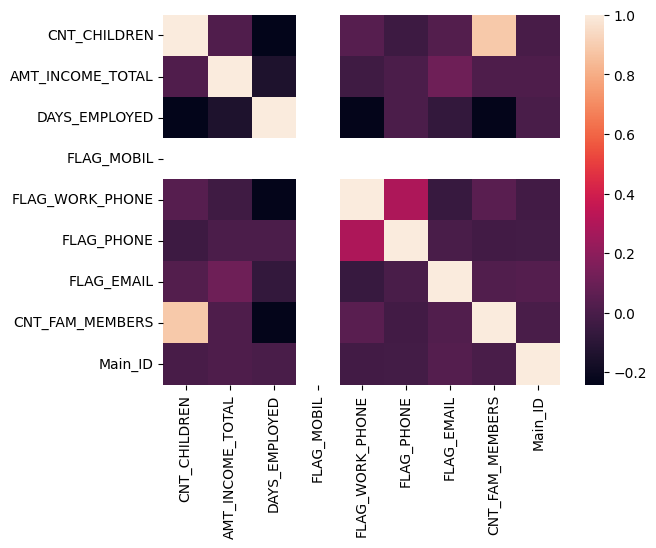

In [26]:
sns.heatmap(df.corr())

In [27]:
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,None,2.0,09/04/1990,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
1,F,N,Y,1.0,90000.0,State servant,Secondary / secondary special,Married,House / apartment,-3659.0,...,0.0,0.0,0.0,Medicine staff,3.0,07/06/1984,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
2,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,None,2.0,09/04/1990,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
3,M,N,Y,0.0,180000.0,Working,Higher education,Civil marriage,With parents,-390.0,...,0.0,0.0,0.0,Sales staff,2.0,21/02/1995,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
4,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,...,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,5008806D,"72701, AR, 218 Shipley Alley"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438762,M,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,NaN,...,0.0,0.0,0.0,None,1.0,NaN,L,6840104,6840104L,"1699 Chatham Parkway, 31405, GA"
438763,F,N,N,0.0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-3007.0,...,0.0,0.0,0.0,Laborers,1.0,02/07/1979,Y,6840222,6840222Y,"14285 Wycliff Way, 95954, CA"
438764,NaN,N,N,0.0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-372.0,...,1.0,0.0,0.0,Sales staff,1.0,09/10/2000,A,6841878,6841878A,"73034, OK, 1605 Remington Road"
438765,F,N,Y,0.0,72000.0,Pensioner,Secondary / secondary special,Married,NaN,365243.0,...,0.0,0.0,0.0,None,2.0,20/10/1963,R,6842765,6842765R,"73008, OK, 4709 North Willow Avenue"


Llegados a este punto, tras imputar todos los valores posibles, decidimos hacer un drop de todos aquellos no imputables, así como de los no relevantes (sin ninguna conexión o correlación relevante al resto de valores).

In [28]:
df.dropna(subset=['CODE_GENDER', 'DAYS_EMPLOYED', 'DAYS_BIRTH_CLEAN'])

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,None,2.0,09/04/1990,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
1,F,N,Y,1.0,90000.0,State servant,Secondary / secondary special,Married,House / apartment,-3659.0,...,0.0,0.0,0.0,Medicine staff,3.0,07/06/1984,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
2,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,None,2.0,09/04/1990,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
3,M,N,Y,0.0,180000.0,Working,Higher education,Civil marriage,With parents,-390.0,...,0.0,0.0,0.0,Sales staff,2.0,21/02/1995,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
4,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,...,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,5008806D,"72701, AR, 218 Shipley Alley"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438760,F,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,365243.0,...,0.0,0.0,0.0,None,1.0,10/12/1960,D,6840100,6840100D,"73034, OK, 230 East 8th Street"
438761,F,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,365243.0,...,0.0,0.0,0.0,None,1.0,10/12/1960,C,6840102,6840102C,"06042, CT, 24 Lawton Road"
438763,F,N,N,0.0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-3007.0,...,0.0,0.0,0.0,Laborers,1.0,02/07/1979,Y,6840222,6840222Y,"14285 Wycliff Way, 95954, CA"
438765,F,N,Y,0.0,72000.0,Pensioner,Secondary / secondary special,Married,NaN,365243.0,...,0.0,0.0,0.0,None,2.0,20/10/1963,R,6842765,6842765R,"73008, OK, 4709 North Willow Avenue"


In [29]:
df.dropna(inplace=True)
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,None,2.0,09/04/1990,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
1,F,N,Y,1.0,90000.0,State servant,Secondary / secondary special,Married,House / apartment,-3659.0,...,0.0,0.0,0.0,Medicine staff,3.0,07/06/1984,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
2,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,None,2.0,09/04/1990,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
3,M,N,Y,0.0,180000.0,Working,Higher education,Civil marriage,With parents,-390.0,...,0.0,0.0,0.0,Sales staff,2.0,21/02/1995,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
4,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,...,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,5008806D,"72701, AR, 218 Shipley Alley"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438758,M,Y,Y,1.0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-2095.0,...,0.0,0.0,0.0,Laborers,3.0,22/09/1988,J,6839936,6839936J,"31419, GA, 212 Holiday Circle"
438760,F,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,365243.0,...,0.0,0.0,0.0,None,1.0,10/12/1960,D,6840100,6840100D,"73034, OK, 230 East 8th Street"
438761,F,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,365243.0,...,0.0,0.0,0.0,None,1.0,10/12/1960,C,6840102,6840102C,"06042, CT, 24 Lawton Road"
438763,F,N,N,0.0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-3007.0,...,0.0,0.0,0.0,Laborers,1.0,02/07/1979,Y,6840222,6840222Y,"14285 Wycliff Way, 95954, CA"


In [30]:
df.isna().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
DAYS_BIRTH_CLEAN       0
Letter                 0
Main_ID                0
New_ID                 0
ADDRESS                0
dtype: int64

In [32]:
#Hacemos drop de las columnas que no usamos.
df.drop(columns=['CNT_FAM_MEMBERS', 'FLAG_WORK_PHONE', 'FLAG_MOBIL', 'FLAG_PHONE', 'FLAG_EMAIL', 'NAME_HOUSING_TYPE'], inplace=True)
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,-4542.0,None,09/04/1990,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
1,F,N,Y,1.0,90000.0,State servant,Secondary / secondary special,Married,-3659.0,Medicine staff,07/06/1984,L,5008804,5008804L,"06042, CT, 31 Mitchell Road"
2,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,-4542.0,None,09/04/1990,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
3,M,N,Y,0.0,180000.0,Working,Higher education,Civil marriage,-390.0,Sales staff,21/02/1995,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue"
4,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,-1134.0,Security staff,06/05/1964,D,5008806,5008806D,"72701, AR, 218 Shipley Alley"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438758,M,Y,Y,1.0,135000.0,Working,Secondary / secondary special,Married,-2095.0,Laborers,22/09/1988,J,6839936,6839936J,"31419, GA, 212 Holiday Circle"
438760,F,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,365243.0,None,10/12/1960,D,6840100,6840100D,"73034, OK, 230 East 8th Street"
438761,F,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,365243.0,None,10/12/1960,C,6840102,6840102C,"06042, CT, 24 Lawton Road"
438763,F,N,N,0.0,103500.0,Working,Secondary / secondary special,Single / not married,-3007.0,Laborers,02/07/1979,Y,6840222,6840222Y,"14285 Wycliff Way, 95954, CA"


In [34]:
#Creamos una nueva columna en el dataframe modificando la variable dataframe
df['Children'] = df['CNT_CHILDREN'].apply(lambda x: 1 if x != 0 else 0)

# FEATURE ENGINEERING

In [35]:
#Transformamos las variables categóricas en grupos más pequeños.
df.replace({'NAME_INCOME_TYPE':{'Commercial associate': 'Working'}}, inplace=True)
df.replace({'NAME_INCOME_TYPE':{'State servant': 'Working'}}, inplace=True)

In [36]:
# Convertimos 'DAYS_BIRTH' en la columna 'Age'
df['DAYS_BIRTH_CLEAN'] = pd.to_datetime(df['DAYS_BIRTH_CLEAN'])
df['Age'] = (datetime.now() - df['DAYS_BIRTH_CLEAN'])
df['Age'] = df['DAYS_BIRTH_CLEAN'].dt.year
df['Age'] = 2023 - df['Age']

# Dropeamos la columna 'DAYS_BIRTH'
df.drop(columns=['DAYS_BIRTH_CLEAN'], axis=1, inplace=True)

/var/folders/yp/kl3rr86d27bgdgm1ld7kqmz40000gn/T/ipykernel_14159/4049159737.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DAYS_BIRTH_CLEAN'] = pd.to_datetime(df['DAYS_BIRTH_CLEAN'])


In [37]:
#Convertimos 'civil marriage' a 'married'
df.replace({'NAME_FAMILY_STATUS':{'Civil marriage':'Married'}}, inplace=True)
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,Letter,Main_ID,New_ID,ADDRESS,Children,Age
0,M,Y,Y,0.0,427500.0,Working,Higher education,Married,-4542.0,None,L,5008804,5008804L,"06042, CT, 31 Mitchell Road",0,33
1,F,N,Y,1.0,90000.0,Working,Secondary / secondary special,Married,-3659.0,Medicine staff,L,5008804,5008804L,"06042, CT, 31 Mitchell Road",1,39
2,M,Y,Y,0.0,427500.0,Working,Higher education,Married,-4542.0,None,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue",0,33
3,M,N,Y,0.0,180000.0,Working,Higher education,Married,-390.0,Sales staff,G,5008805,5008805G,"72703, AR, 1189 Northwest End Avenue",0,28
4,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,-1134.0,Security staff,D,5008806,5008806D,"72701, AR, 218 Shipley Alley",0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438758,M,Y,Y,1.0,135000.0,Working,Secondary / secondary special,Married,-2095.0,Laborers,J,6839936,6839936J,"31419, GA, 212 Holiday Circle",1,35
438760,F,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,365243.0,None,D,6840100,6840100D,"73034, OK, 230 East 8th Street",0,63
438761,F,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,365243.0,None,C,6840102,6840102C,"06042, CT, 24 Lawton Road",0,63
438763,F,N,N,0.0,103500.0,Working,Secondary / secondary special,Single / not married,-3007.0,Laborers,Y,6840222,6840222Y,"14285 Wycliff Way, 95954, CA",0,44


In [38]:
# Convertimos las variables categóricas en dummies 
df = pd.get_dummies(df, columns=['CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'OCCUPATION_TYPE'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292268 entries, 0 to 438766
Data columns (total 46 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   CNT_CHILDREN                                       292268 non-null  float64
 1   AMT_INCOME_TOTAL                                   292268 non-null  float64
 2   DAYS_EMPLOYED                                      292268 non-null  float64
 3   Letter                                             292268 non-null  object 
 4   Main_ID                                            292268 non-null  int64  
 5   New_ID                                             292268 non-null  object 
 6   ADDRESS                                            292268 non-null  object 
 7   Children                                           292268 non-null  int64  
 8   Age                                                292268 non-null  int64 

# JOIN de DATASETS

In [40]:
df_paid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [41]:
df_paid

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [42]:
df_paid['STATUS']= df_paid['STATUS'].astype(str)

In [43]:
df_paid = df_paid[df_paid["STATUS"] != "X"]
df_paid = df_paid[df_paid["MONTHS_BALANCE"] > -13]
def replacing(x):
    if(x in ["0", "1", "2", "3", "4", "5"]):
        x = 0
    else:
        x = 1
    return x
df_paid["STATUS"] = df_paid["STATUS"].map(replacing)
paid_df3 = df_paid[["ID", "STATUS"]].groupby(["ID"])["STATUS"].agg(pd.Series.mode)
paid_df3 = paid_df3.to_frame()
paid_df3 = paid_df3.reset_index()
paid_df3.rename(columns={0: "STATUS"}, inplace = True)

In [44]:
paid_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34338 entries, 0 to 34337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      34338 non-null  int64 
 1   STATUS  34338 non-null  object
dtypes: int64(1), object(1)
memory usage: 536.7+ KB


In [45]:
paid_df3['STATUS'] = pd.to_numeric(paid_df3['STATUS'], errors='coerce')
paid_df3 = paid_df3.dropna()

In [46]:
paid_df3

,ID,STATUS
0,5001711,0.0
1,5001712,1.0
2,5001717,0.0
3,5001718,0.0
4,5001719,1.0
...,...,...
34333,5150479,1.0
34334,5150482,1.0
34335,5150484,0.0
34336,5150485,0.0


In [47]:
df_final = paid_df3.merge(df, left_on = "ID", right_on = "Main_ID")

In [48]:
good = df_final.loc[df_final["STATUS"] == 1]
bad = df_final.loc[df_final["STATUS"] == 0]

In [49]:
good.describe()

,ID,STATUS,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,Main_ID,Children,Age,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_None,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
count,8.874000e+03,8874.0,8874.000000,8.874000e+03,8874.000000,8.874000e+03,8874.000000,8874.000000,8874.000000,8874.000000,...,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000
mean,5.078626e+06,1.0,0.430246,1.850892e+05,58399.834911,5.078626e+06,0.307528,44.166103,0.663286,0.336714,...,0.005071,0.080685,0.032905,0.328262,0.007099,0.001690,0.089926,0.004282,0.014537,0.003831
std,4.188905e+04,0.0,0.729606,9.722368e+04,136970.847426,4.188905e+04,0.461496,11.471087,0.472613,0.472613,...,0.071034,0.272366,0.178398,0.469607,0.083963,0.041081,0.286091,0.065302,0.119696,0.061783
min,5.008804e+06,1.0,0.000000,2.700000e+04,-15661.000000,5.008804e+06,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.045386e+06,1.0,0.000000,1.192500e+05,-3234.000000,5.045386e+06,0.000000,35.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.074614e+06,1.0,0.000000,1.575000e+05,-1649.500000,5.074614e+06,0.000000,43.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.115614e+06,1.0,1.000000,2.250000e+05,-433.000000,5.115614e+06,1.000000,54.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.150482e+06,1.0,7.000000,1.575000e+06,365243.000000,5.150482e+06,1.000000,69.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
bad.describe()

,ID,STATUS,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,Main_ID,Children,Age,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_None,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
count,8.613000e+03,8613.0,8613.000000,8.613000e+03,8613.000000,8.613000e+03,8613.000000,8613.000000,8613.000000,8613.000000,...,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000
mean,5.078131e+06,0.0,0.422153,1.872522e+05,58817.741670,5.078131e+06,0.301173,43.973296,0.672124,0.327876,...,0.004064,0.078834,0.031464,0.321607,0.009520,0.002903,0.097295,0.004992,0.019157,0.005109
std,4.208352e+04,0.0,0.774885,1.066906e+05,137148.218887,4.208352e+04,0.458794,11.591224,0.469467,0.469467,...,0.063621,0.269496,0.174578,0.467120,0.097113,0.053801,0.296376,0.070485,0.137085,0.071296
min,5.008808e+06,0.0,0.000000,2.925000e+04,-15661.000000,5.008808e+06,0.000000,21.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.042040e+06,0.0,0.000000,1.215000e+05,-3050.000000,5.042040e+06,0.000000,34.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.069325e+06,0.0,0.000000,1.575000e+05,-1398.000000,5.069325e+06,0.000000,43.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.115629e+06,0.0,1.000000,2.250000e+05,-399.000000,5.115629e+06,1.000000,54.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.150485e+06,0.0,19.000000,1.575000e+06,365243.000000,5.150485e+06,1.000000,69.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MODEL TRAINING

In [57]:
!pip install lazypredict
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [56]:
X = df_final.drop(["STATUS", "Letter", "Main_ID", "New_ID", "ADDRESS"], axis=1)
Y = df_final["STATUS"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify= Y,test_size = 0.2, random_state = 64)
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, pred = clf.fit(X_train, X_test, y_train, y_test)
models

 14%|█▍        | 4/29 [00:29<04:33, 10.95s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 90%|████████▉ | 26/29 [03:55<00:45, 15.14s/it]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [04:00<00:00,  8.29s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.61,0.61,0.61,0.61,3.42
DecisionTreeClassifier,0.61,0.61,0.61,0.61,0.29
LabelSpreading,0.61,0.61,0.61,0.61,24.86
LabelPropagation,0.61,0.60,0.60,0.60,11.82
BaggingClassifier,0.60,0.60,0.60,0.60,2.34
ExtraTreesClassifier,0.60,0.60,0.60,0.60,3.90
ExtraTreeClassifier,0.60,0.60,0.60,0.60,0.11
LGBMClassifier,0.59,0.59,0.59,0.59,0.63
XGBClassifier,0.59,0.59,0.59,0.59,3.89


In [62]:
from sklearn.linear_model import LogisticRegression
>>> from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
y_pred = rf.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6080617495711835


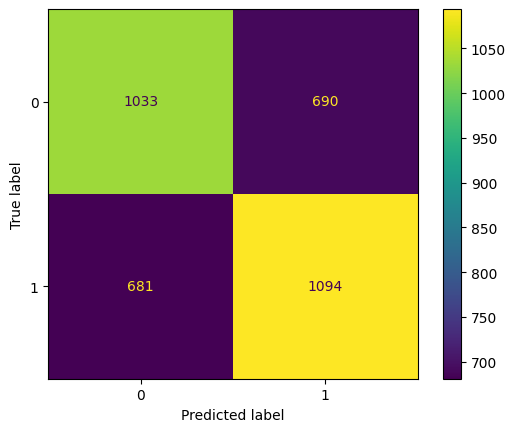

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Generamos predicciones con el mejor modelo 
y_pred = rf.predict(X_test)

# Creamos la confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();